# Business Problem

Australian company, IM Vehicles, is looking to hit the US car market and produce cars suitable for the US. Different countries value different factors when it comes to making cars for their markets and so it is important to understand the market of the country a company is looking to produce in. 

IM Vehicles wants to know a few things. They want to know what kind of factors mainly contribute to the price of a car in the US, how much they contribute to a cars price and what is favoured when it comes to these variables. 

A dataset containing information about different cars around the US has been sourced and is based on various market surveys. We will be helping them analyse the different variables in this dataset and how they influence the price of US cars and recommending them to consider particular variables when it comes to manufacturing their cars. 

In [1]:
import pandas as pd 
import numpy as np

import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#importing packages

In [2]:
car = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.shape

(205, 26)

In [5]:
car['carbody'].mode()

#the most frequently purchased carbody: sedan

0    sedan
dtype: object

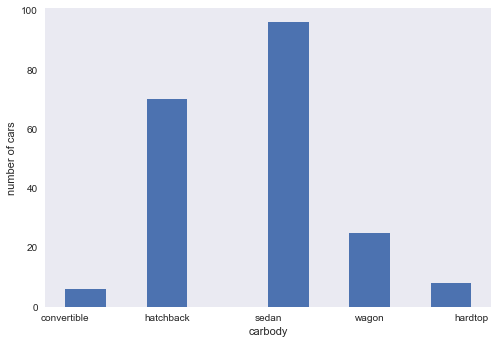

In [6]:
car['carbody'].hist()
plt.xlabel("carbody")
plt.ylabel("number of cars")
plt.grid(False)

In [7]:
car['fueltype'].mode()

#the most frequently used fueltype: gas

0    gas
dtype: object

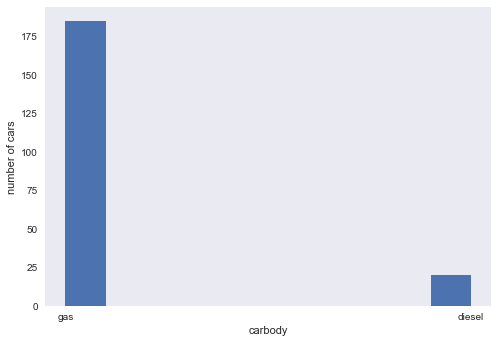

In [8]:
car['fueltype'].hist()
plt.xlabel("carbody")
plt.ylabel("number of cars")
plt.grid(False)

In [9]:
car['aspiration'].mode()

#the most frequent aspiration that cards had: std (standard)

0    std
dtype: object

In [10]:
car['doornumber'].mode()

#the most frequent number of doors cars had: 4

0    four
dtype: object

In [11]:
car['enginelocation'].mode()

#the most frequent location of engines in cars: front engine

0    front
dtype: object

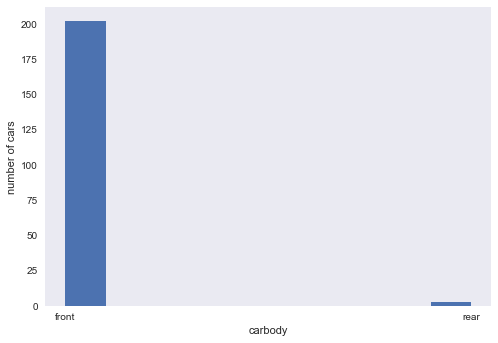

In [12]:
car['enginelocation'].hist()
plt.xlabel("carbody")
plt.ylabel("number of cars")
plt.grid(False)

In [13]:
car['CarName'].mode()

#the most frequent car recorded: peugeot 504, followed by toyota corolla

0       peugeot 504
1    toyota corolla
2     toyota corona
dtype: object

In [14]:
car['fuelsystem'].mode()

#the most frequently had fuelsystem: mpfi - typical petrol engines

0    mpfi
dtype: object

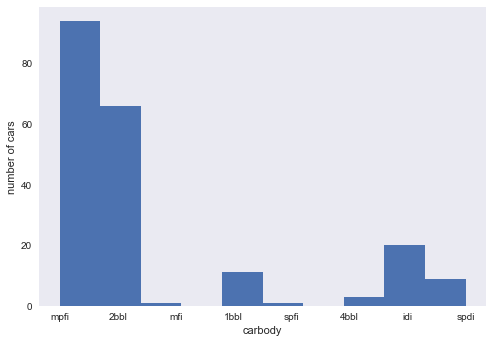

In [15]:
car['fuelsystem'].hist()
plt.xlabel("carbody")
plt.ylabel("number of cars")
plt.grid(False)

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Observations

Firstly, the data from the dataset was observed. It contained multiple variables including things like fuel type, aspiration, number of doors, car body type, car width, engine size and horsepower, just to name a few out of the twenty six. Each row was also matched to a car name, and it seemed the most frequently occuring car in this dataset was the Toyota Corolla. 

Some other observations included that most cars in the dataset were sedans, almost all used petrol as their fuel type opposed to diesel, and the majority of cars ran on a mfbi fuel system which is the typical fuel injection system most cars run on. 

Around half of the variables were categorical, meaning they grouped into categories based on what they were for each variable. The rest were numerical, meaning they were given numeric values for the variable. 

Looking at the info, there are 10 object data type columns and the rest are floats or integers. The variables which are CarName, fueltype, aspiration, doornumbers, carbody, drivewheel, enginelocation, enginetype, cylindernumber, and I would say these are categorical. 

# Data Cleaning

The first step was to clean the data. The "Car_ID" column was dropped as it only stated a numeric value to show which row/car it corresponded. The rest of the variables were kept as we were yet to find out which variables would be important for this research.

The next step was to assess the data types of the columns and determine how to go about making them all uniform. As mentioned before, the columns that were categorical would need to be dealt with as they do not follow a numeric output, which makes it harder to carry out an analysis. A method called Label Encoding was used on these categorical variables, some including fuel system, engine type, car body, which coded the categories within variables to specific numeric codes. 

After that, outliers were looked at when it came to price. For this dataset, these outliers were not dropped because they were not unreasonably high or out of the range. The cars show a price range of 5000 and 45000 dollars and so this information would actually be useful to what would contribute to higher or lower prices. 

Next was to assess the correlations between variables to see if there are any that are too highly correlated. Too highly correlated variables would mean there is multicolinarity in our regression model. From creating a correlation heatmap, we were able to see that the variables carlength and wheelbase were closely correlated, curbweight and carwidth were closely correlated and highwaympg and citympg were closely correlated. Dropped from the dataset were then wheelbase, curbweight and highwaympg. 

In [17]:
car.drop('car_ID', axis=1, inplace=True)

In [18]:
car.isnull().sum()

#checking NaNs, there are none

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [19]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


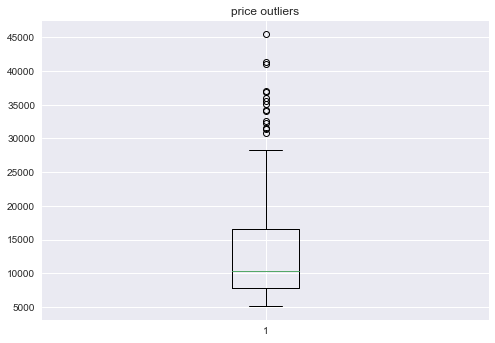

In [20]:
plt.boxplot(car['price'])
plt.title ("price outliers")
plt.show()

#looking at the outliers within price and where its concentrated

In [21]:
carengine = car[['price', 'enginesize']]

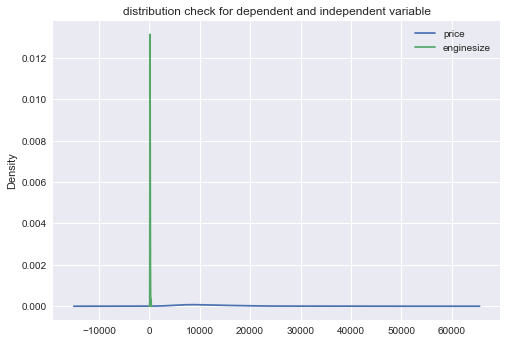

In [22]:
carengine.plot.kde()
plt.title("distribution check for dependent and independent variable")
plt.show()

#showing the residuals, outliers, shows outliers.

/Users/kumarasinghe/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='enginesize', ylabel='Density'>

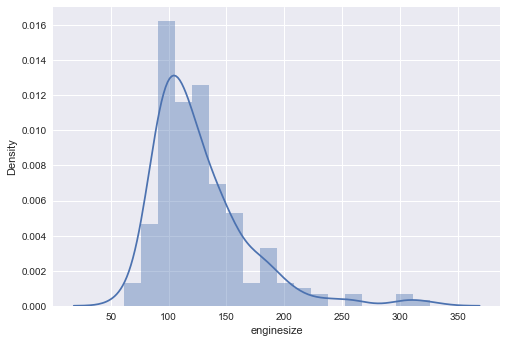

In [23]:
sns.distplot(car['enginesize'])

# Droppping variables based on correlation for multicolinearity

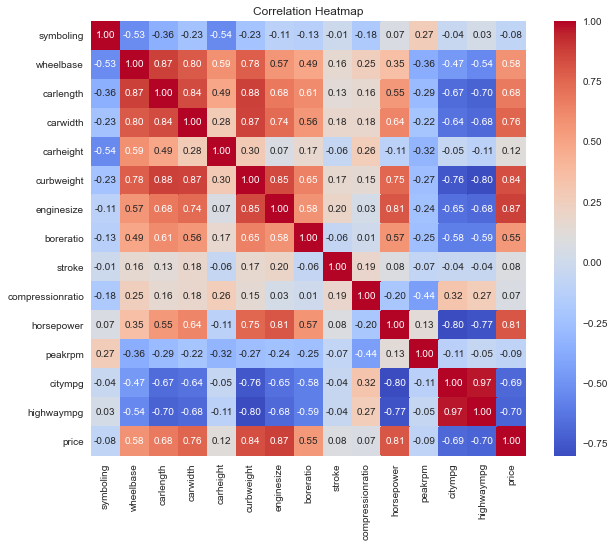

In [24]:
correlation_matrix = car.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()


Looking at the correlation heatmap to see if there are other variables that are closely correlated and dropping one of them. Also seeing those which have a negative correlation. 

- carlength & wheelbase
- curbweight & carwidth
- highwaympg and citymgp

In [26]:
car['price'].sort_values(ascending=False).head(20)

74     45400.0
16     41315.0
73     40960.0
128    37028.0
17     36880.0
49     36000.0
48     35550.0
72     35056.0
71     34184.0
127    34028.0
126    32528.0
47     32250.0
70     31600.0
129    31400.5
15     30760.0
68     28248.0
69     28176.0
67     25552.0
14     24565.0
8      23875.0
Name: price, dtype: float64

In [27]:
abs(car.corr()['price']).sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

# Fixing Categorical Data

In [28]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
car['fuelsystem']=lab.fit_transform(car['fuelsystem'])
car['cylindernumber']=lab.fit_transform(car['cylindernumber'])
car['enginetype']=lab.fit_transform(car['enginetype'])
car['enginelocation']=lab.fit_transform(car['enginelocation'])
car['drivewheel']=lab.fit_transform(car['drivewheel'])
car['carbody']=lab.fit_transform(car['carbody'])
car['doornumber']=lab.fit_transform(car['doornumber'])
car['aspiration']=lab.fit_transform(car['aspiration'])
car['fueltype']=lab.fit_transform(car['fueltype'])
car['CarName']=lab.fit_transform(car['CarName'])

#label encoding variables and now they are changed from objects to integers and floats

In [29]:
car.info()

#they are now objects from integers and floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [30]:
car.drop('wheelbase', axis=1, inplace=True)
car.drop('curbweight', axis=1, inplace=True)
car.drop('highwaympg', axis=1, inplace=True)

<AxesSubplot:xlabel='price', ylabel='enginesize'>

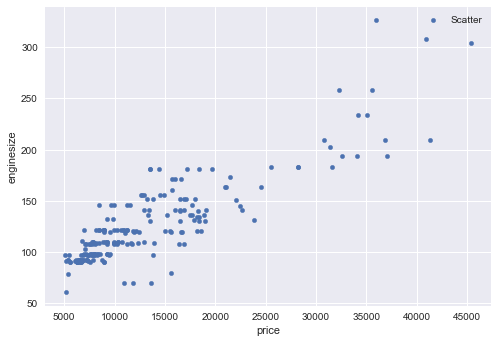

In [31]:
fig, ax = plt.subplots()
car.plot.scatter(x='price', y='enginesize', label ='Scatter', ax=ax)

# Model Creation - Summary

Once all the data was cleaned, it was time to create the regression models. Regression models are created to determine which variables influence a dependent variable, in this case the price. For the first regression model, the most correlated variable with price was used to create a base model. For the base model, the r-squared for the model was 0.77 which is quite good and tells us that the engine size does influence the price. Looking at a scatter plot of this  with the regression line, we can see that the regression line follows the plots. 

For the next regression model, the top correlated variables were added to the model. The r-squared value increased to quite a good score of 0.91, meaning that the model explains 91 per cent of the variance in price. However, a lot of the variables had an insignificant p-value when the threshold was 0.05, meaning that they were not statistically significant for the model. When the regression was re-run with different test samples, the variables p-values seemed to vary between 0.05 to 0.1 and so the threshhold was reset to 0.10. This meant that the significant variables were now enginesize, horsepower, carwidth, boreratio, enginelcoation and carheight. The condition number in this model was quite high suggeesting there may be some multicolinearity amongst the variables. 

For model 3, the insignificant variables were dropped and a scaling method was used to combat the high multicolinearity score. Upon doing this, the r-squared dropped slightly to 0.84 however the majority of variables were significant this time, with the threshold p-value being 0.05 this time. The condition number also decereased meaning there was less multicolinearity.

For model 4, the variables carheight and boreratio were dropped as their p-values did not meet the threshold. Model 4 concluded with the same r-squared value which has been quite good and all the variables used were then significant for the model. The condition number stayed low and the skewness was at an appropriate number, close to 0 meaning an almost normal distribution. The kurtosis was almost at 3, also meaning an almost normal distribution. The variables in this final model were engine size, horsepower, car width and engine location. This means that these variables influence the price of a car quite significantly and the model can predict car prices. 

As for the variables and what they mean for price, firstly, a cars engine size significantly increased the price. A unit increase meant 2419 dollar increase which means that the size of a cars engine is valued in the US market. For horsepower, its significance in the model meant a 2285 dollar increase when there was an increase in the unit, meaning when there is a higher horsepower of a car, the car price significantly increases. As for car width, when there as a unit increase, there would be a increase of 2577 dollars, explaining an increase in car types e.g. the different between a sedan and fwd. Lastly the engine location being at either the front or rear of the car made a big difference to the price. Seeing as there were only two options, having it at the back of the car decreased the price, which makes sense because cars rarely have an engine at the back as consumers would prefer to have them at the front. 



# Model 1 - OLS Regression

In [32]:
X = car[['enginesize']]
Y = car[['price']]

X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size =0.3)

predictors = X_test
predictors_int = sm.add_constant(predictors)
base_model = sm.OLS(Y_test,predictors_int).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.51e-20
Time:                        11:32:31   Log-Likelihood:                -608.26
No. Observations:                  62   AIC:                             1221.
Df Residuals:                      60   BIC:                             1225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8125.4094   1632.434     -4.977      0.000   -1.14e+04   -4860.055
enginesize   169.0614     12.085     13.990      0.000     144.888     193.235
==============================================================================
Omnibus:                       14.122   Durbin-Watson:                   2.628
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.683
Skew:                           0.964   Prob(JB):                     0.000238
Kurtosis:                       4.655   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

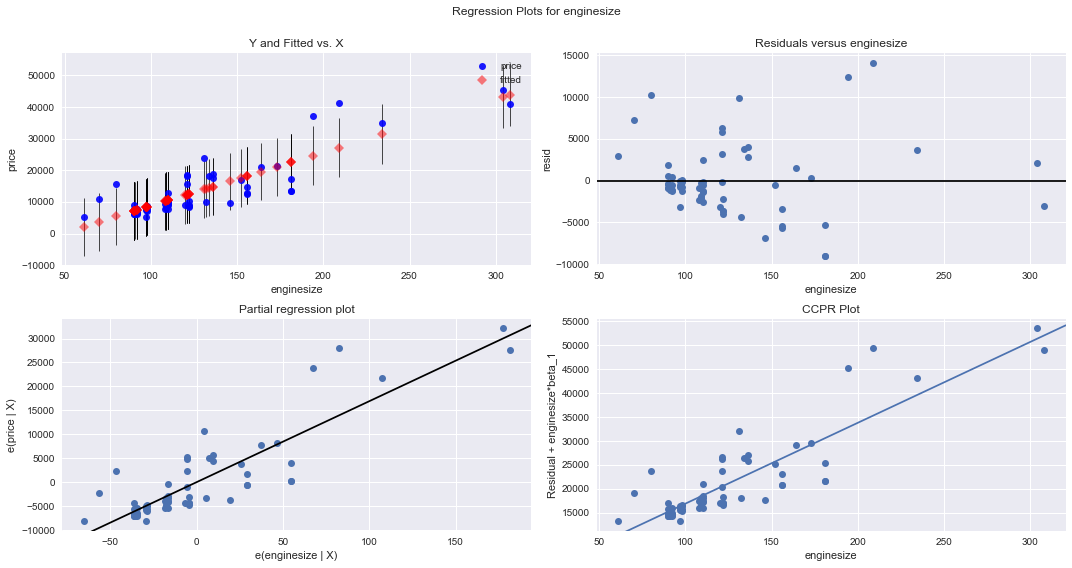

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(base_model, "enginesize", fig=fig)
plt.show()

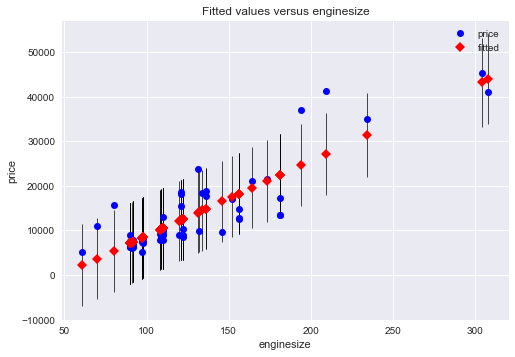

In [34]:
sm.graphics.plot_fit(base_model, 'enginesize')
plt.show()

# Checking Linearity of Regression Line

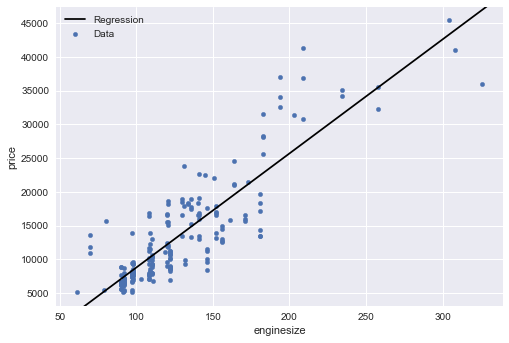

In [35]:
fig, ax = plt.subplots()
car.plot.scatter(x='enginesize', y='price', label ='Data', ax=ax)
sm.graphics.abline_plot(model_results=base_model, label= 'Regression', ax=ax, color='black')
ax.legend();

The regression line appears linear and the scatter plots seem quite linear too showing that there is homoscacisity. The outliers dont really seem to have much of an effect on the regression line either. 

# Checking Normality - QQ plot

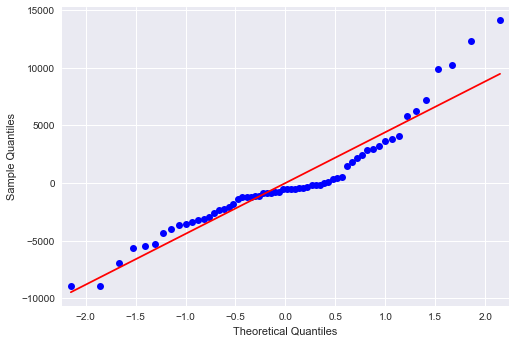

In [36]:
sm.qqplot(base_model.resid, line='s');

Appears as the distribution is quite normal. The QQ plot is showing us the standardised values of residuals to determine the normal distribution of error. 

# Checking Homoscedasticity - Scatter Plot

<AxesSubplot:xlabel='price', ylabel='enginesize'>

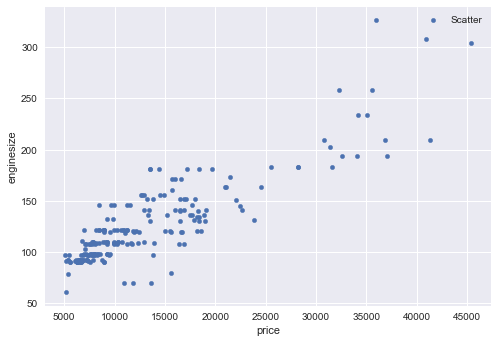

In [37]:
fig, ax = plt.subplots()
car.plot.scatter(x='price', y='enginesize', label ='Scatter', ax=ax)

Appears to be quite linear refer to checking linearity above. 

In [38]:
abs(car.corr()['price']).sort_values(ascending=False)

price               1.000000
enginesize          0.874145
horsepower          0.808139
carwidth            0.759325
citympg             0.685751
carlength           0.682920
drivewheel          0.577992
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
CarName             0.231439
aspiration          0.177926
carheight           0.119336
fueltype            0.105679
peakrpm             0.085267
carbody             0.083976
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
doornumber          0.031835
cylindernumber      0.027628
Name: price, dtype: float64

# Model 2 - Regression Model

In [52]:
X_2 = car[['enginesize', 'horsepower', 'carwidth', 'citympg', 'carlength', 'drivewheel', 'boreratio',
           'fuelsystem', 'enginelocation', 'aspiration', 'carheight']]
Y = car[['price']]

X_train, X_test,Y_train,Y_test = train_test_split(X_2, Y,test_size =0.3)

predictors = X_test
predictors_int = sm.add_constant(predictors)
base_model = sm.OLS(Y_test,predictors_int).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     58.12
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.40e-24
Time:                        11:57:33   Log-Likelihood:                -571.73
No. Observations:                  62   AIC:                             1167.
Df Residuals:                      50   BIC:                             1193.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.948e+04   2.27e+04     -4.381      0.000   -1.45e+05   -5.39e+04
enginesize       106.6094     20.343      5.240      0.000      65.748     147.471
horsepower        51.7924     30.357      1.706      0.094      -9.181     112.766
carwidth        1537.6056    400.921      3.835      0.000     732.332    2342.879
citympg         -123.0940    105.208     -1.170      0.248    -334.410      88.222
carlength       -129.8178     79.395     -1.635      0.108    -289.287      29.652
drivewheel      1432.0482    911.142      1.572      0.122    -398.034    3262.130
boreratio      -3801.5514   2270.135     -1.675      0.100   -8361.252     758.150
fuelsystem      -233.0302    270.006     -0.863      0.392    -775.354     309.293
enginelocation  1.322e+04   3443.071      3.839      0.000    6302.601    2.01e+04
aspiration      -419.7127    968.352     -0.433      0.667   -2364.705    1525.280
carheight        551.9227    213.192      2.589      0.013     123.714     980.131
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.381
Skew:                          -0.100   Prob(JB):                        0.826
Kurtosis:                       3.328   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R squared value was 0.910 meaning that the model explains 91 per cent of the variance in price.
The y-intercept was -$69450 which is where we start at when x = 0. A majority of the variables had an insignicicant p-value when the threshold was 0.05 but a lot of them were close or a little higher than the threshold. This seemed to vary when the regression was re-run with different test samples, and so I decided to then make the threshold 0.10. This now meant that the significant variables were enginesize, horsepower, carwidth, boreratio, enginelocation and carheight.

The condition number is high meaning that there might be some multicolineaarity amongst the variables. For the next model, variables will be dropped based on their insignificance for the regression. I will also remove some of the outliers for the sake of the regression. 


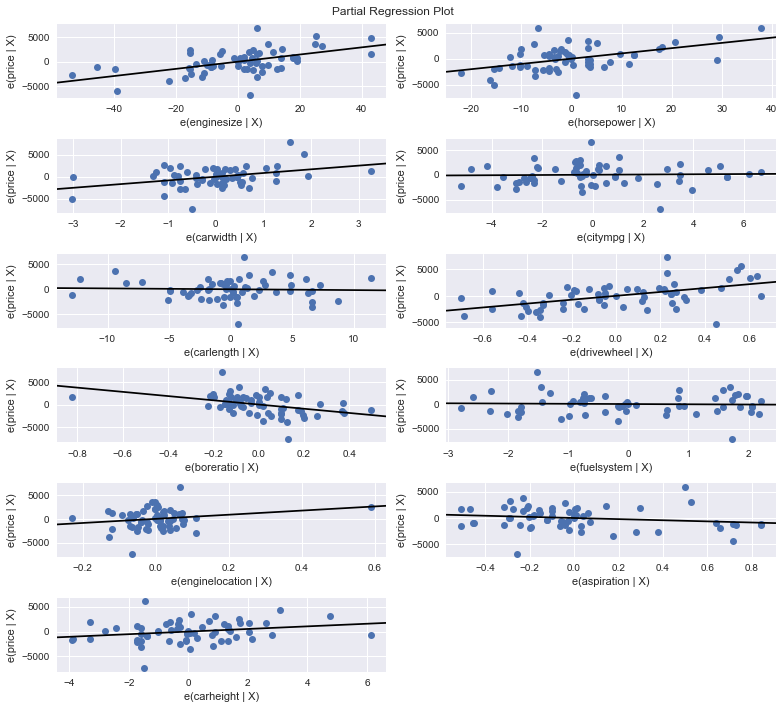

In [40]:
fig = plt.figure(figsize=(11,10))
sm.graphics.plot_partregress_grid(base_model, exog_idx=['enginesize', 'horsepower','carwidth', 'citympg', 'carlength', 
                                                        'drivewheel', 'boreratio', 'fuelsystem', 
                                                        'enginelocation', 'aspiration', 'carheight'], fig=fig)
plt.tight_layout()
plt.show()

# Model 3 - Regression 

For the third model, I decided to drop some variables. The variables which had a p-value over 0.05 were dropped as they were insiginficant. Variables dropped were: horsepower, carlength, carwidth, citympg, drivewheel, boreratio, fuel system and aspiration. I also decided to scale

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X_3 = car[['enginesize', 'horsepower', 'carwidth', 'boreratio', 'enginelocation', 'carheight']]
Y = car[['price']]

In [55]:
scaler = StandardScaler()
X_3 = scaler.fit_transform(X_3)

In [56]:
X_train, X_test,Y_train,Y_test = train_test_split(X_3, Y,test_size =0.3)

predictors = X_test
predictors_int = sm.add_constant(predictors)
base_model = sm.OLS(Y_test,predictors_int).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     51.04
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.02e-20
Time:                        12:00:44   Log-Likelihood:                -588.55
No. Observations:                  62   AIC:                             1191.
Df Residuals:                      55   BIC:                             1206.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.409e+04    440.662     31.976      0.000    1.32e+04     1.5e+04
x1          2679.1451    942.331      2.843      0.006     790.672    4567.619
x2          3482.4661   1037.603      3.356      0.001    1403.063    5561.869
x3          1718.0871    730.499      2.352      0.022     254.134    3182.041
x4          -287.6283    611.400     -0.470      0.640   -1512.901     937.644
x5          1038.0023    475.785      2.182      0.033      84.508    1991.496
x6           945.4945    481.834      1.962      0.055     -20.122    1911.111
==============================================================================
Omnibus:                       28.622   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.504
Skew:                           1.440   Prob(JB):                     1.62e-14
Kurtosis:                       7.036   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

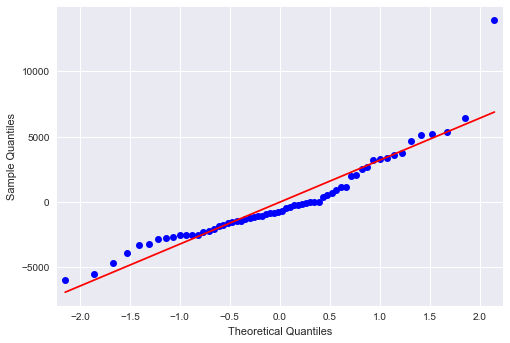

In [57]:
sm.qqplot(base_model.resid, line='s');

In [58]:
X_4 = pd.DataFrame(X_3)

# Model 4

Upon dropping variables with an insignificant p-value and scaling the data, the r squared has not increased however the majority of the p-values of the variables used are significant. The condition number has also decreased meaning there is less multicolinearity. For model 4, the variables carheight and boreration will be dropped as their p-values were over 0.05, which is what the threshold will be for the model now. 

In [59]:
X_4

,0,1,2,3,4,5
0,0.074449,0.174483,-0.844782,0.519071,-0.121867,-2.020417
1,0.074449,0.174483,-0.844782,0.519071,-0.121867,-2.020417
2,0.604046,1.264536,-0.190566,-2.404880,-0.121867,-0.543527
3,-0.431076,-0.053668,0.136542,-0.517266,-0.121867,0.235942
4,0.218885,0.275883,0.230001,-0.517266,-0.121867,0.235942
...,...,...,...,...,...,...
200,0.339248,0.250533,1.398245,1.666445,-0.121867,0.728239
201,0.339248,1.416637,1.351515,1.666445,-0.121867,0.728239
202,1.109571,0.757535,1.398245,0.926204,-0.121867,0.728239
203,0.435538,0.047732,1.398245,-1.183483,-0.121867,0.728239


In [60]:
X_4.drop([3], axis=1, inplace=True)
X_4.drop([5], axis=1, inplace=True)

In [61]:
Y = car[['price']]

X_train, X_test,Y_train,Y_test = train_test_split(X_4, Y,test_size =0.3)

predictors = X_test
predictors_int = sm.add_constant(predictors)
base_model = sm.OLS(Y_test,predictors_int).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.47e-23
Time:                        12:04:31   Log-Likelihood:                -580.68
No. Observations:                  62   AIC:                             1169.
Df Residuals:                      58   BIC:                             1178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           2419.9851    627.782      3.855      0.000    1163.343    3676.627
1           2285.3774    752.083      3.039      0.004     779.919    3790.836
2           2577.8277    650.461      3.963      0.000    1275.789    3879.867
4          -1.066e+05   3049.865    -34.945      0.000   -1.13e+05      -1e+05
==============================================================================
Omnibus:                        3.707   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.538
Skew:                           0.576   Prob(JB):                        0.170
Kurtosis:                       2.794   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In Model 4, we can see that the r squared has stayed around the same, now at 0.85 which is still quite good. The p-values of the variables are all significant, below 0.05 meaning this model is appropriate for predicting. The condition number has stayed low meaning there is less multicolinarity or relation between the variables. The variables in the final model were enginesize, horsepower, carwidth and enginelocation.

The skewness is an appropriate number, close to 0 meaning an almost normal distribution. The kurtosis is almost at 3, also meaning an almost normal distribution. The f-statistic is well below 0.05 meaning the model is significant. 


When comparing this to the correlations between car and price, enginesize, horsepower and carwdith had topped the list and had ended up being the most applicable in this regression. Engine loaction was a bit lower on the correlation list and the coeffieicnet was a negative number. There were two options for the engine locatiom, either front or rear, and the majority of vehicles had their engines located in the front. 

In [68]:
car['enginelocation'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: enginelocation, Length: 205, dtype: int64>

In [ ]:
'enginesize', 'horsepower', 'carwidth', , 'enginelocation', 

In [67]:
abs(car.corr()['price']).sort_values(ascending=False)

price               1.000000
enginesize          0.874145
horsepower          0.808139
carwidth            0.759325
citympg             0.685751
carlength           0.682920
drivewheel          0.577992
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
CarName             0.231439
aspiration          0.177926
carheight           0.119336
fueltype            0.105679
peakrpm             0.085267
carbody             0.083976
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
doornumber          0.031835
cylindernumber      0.027628
Name: price, dtype: float64

<ipython-input-66-21a6f9c34e38>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


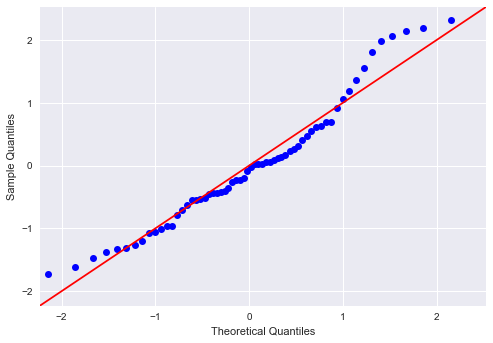

In [66]:
import scipy.stats as stats
residuals = base_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

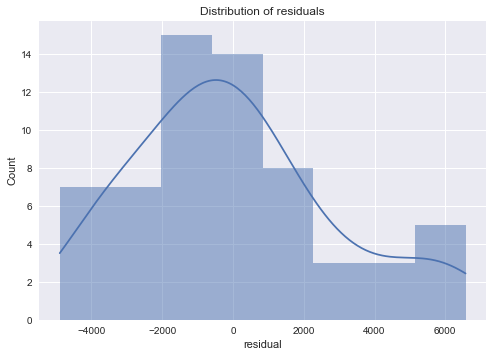

In [90]:
mu, std = stats.norm.fit(base_model.resid)
mu, std
fig, ax = plt.subplots()
sns.histplot(x=base_model.resid, ax=ax, stat="count", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)
sns.lineplot(x=x, color="orange", ax=ax)
plt.show()

#showing the residuals

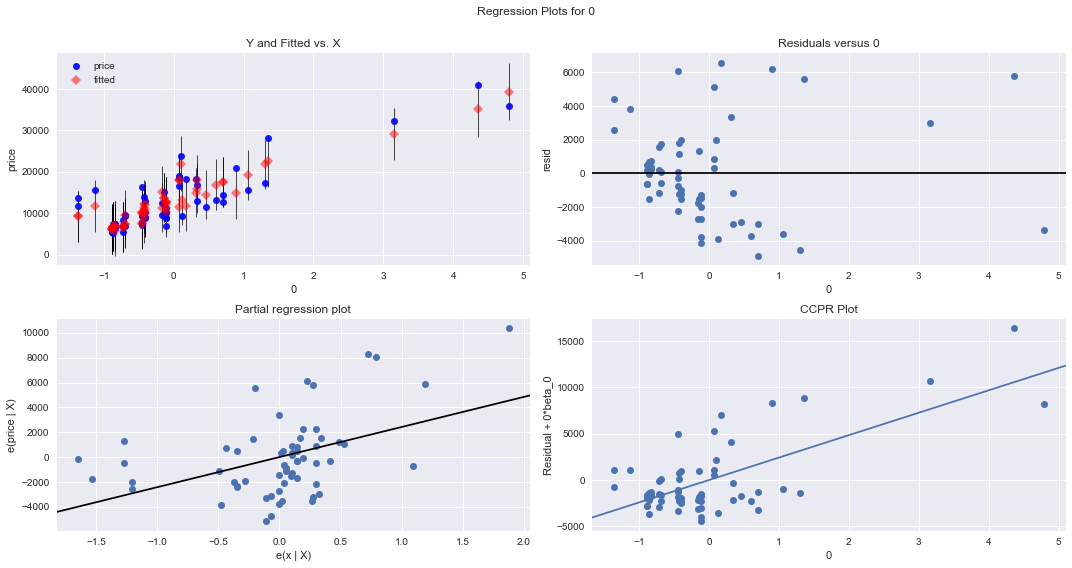

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(base_model, 0, fig=fig)
plt.show()

# Recommendations

IM vehicles was looking to find the factors mainly contribute to the price of a car in the US, giving us a reflection of what US consumers value in cars.  


Consider that the factors engine size, car width, horse power and engine location would significantly impact the price of a car.


When it comes to these variables, the average engine size was around 126L, and so an increase in this would bring up the price, specifically per unit increase would amount in a $2419 increase in price. As for car width, the average car width was around 165cm, with a unit increase amounting in a $2557 which could explain the difference between car types e.g a sedan and FWD. For horsepower, the median horsepower was 104hp, a unit increase would mean a $2285 increase in price.  Horsepower could be important to customers as they can determine how safe a vehicle is, the gas mileage and other factors. The engine location of a car also meant the difference between the car losing and gaining value. A front located engine is the most preferred for customers, with a rear engine barely existing. 3 out of the 4 of these important variables were related to the vehicles engine, signifiying that this is quite important for people in the US market when they are buying cars.

# Limitations

The limitations for this data may include that the size of data was not very large and so an accurate representation may not have been looked at. The models also may have continued to include more variables or a different arrangement of variables. Also, the dataset was not the most recent data, so more new data could be used for next time. 
 